In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import xgboost as xgb

##Scikit learn import

In [28]:
%reload_kedro
df = catalog.load('df_champs_elysee_days_meteo_bank')

[12/05/22 10:27:47] INFO     No path argument was provided. Using: C:\Users\Erwan                    __init__.py:56
                             BOULLIER\Desktop\Datathon\BCG_Hackaton\datathon-bcg-gamma                             

[12/05/22 10:27:47] INFO     Kedro project Datathon BCG Gamma                                        __init__.py:77

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines' __init__.py:78

                    INFO     Registered line magic 'run_viz'                                         __init__.py:84

                    INFO     Loading data from 'df_champs_elysee_days_meteo_bank'               data_catalog.py:343
                             (ParquetDataSet)...                                                                   

In [59]:
df.to_csv('data_full_encoder.csv')

In [27]:
df

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,date,vacances,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,VISIBILITY_AVG_KM,WINDTEMP_MAX_C,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,est_ferie,year_2021,year_2022,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,wday_Tuesday,wday_Wednesday,wday_Thursday,wday_Friday,wday_Saturday,wday_Sunday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,AV_Champs_Elysees,2021-11-01 03:00:00+00:00,1222.00,42.88,2021-11-01,0,15.00,10.00,23.00,11.00,14.00,12.00,0.20,10.00,8.00,0.00,4.00,7.00,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,AV_Champs_Elysees,2021-11-01 04:00:00+00:00,1033.00,44.35,2021-11-01,0,15.00,10.00,23.00,11.00,14.00,12.00,0.20,10.00,8.00,0.00,4.00,7.00,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,AV_Champs_Elysees,2021-11-01 05:00:00+00:00,824.00,20.16,2021-11-01,0,15.00,10.00,23.00,11.00,14.00,12.00,0.20,10.00,8.00,0.00,4.00,7.00,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,AV_Champs_Elysees,2021-11-01 06:00:00+00:00,710.00,12.20,2021-11-01,0,15.00,10.00,23.00,11.00,14.00,12.00,0.20,10.00,8.00,0.00,4.00,7.00,1.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,AV_Champs_Elysees,2021-11-01 07:00:00+00:00,947.00,40.57,2021-11-01,0,15.00,10.00,23.00,11.00,14.00,12.00,0.20,10.00,8.00,0.00,4.00,7.00,1.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,AV_Champs_Elysees,2022-12-03 19:00:00+00:00,1178.00,35.11,2022-12-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9182,AV_Champs_Elysees,2022-12-03 20:00:00+00:00,1107.00,46.06,2022-12-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9183,AV_Champs_Elysees,2022-12-03 21:00:00+00:00,1256.00,33.02,2022-12-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9184,AV_Champs_Elysees,2022-12-03 22:00:00+00:00,1189.00,31.79,2022-12-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
columns_to_drop =['Date et heure de comptage','Libelle','date']
df_dropped = df.drop(columns=columns_to_drop)


In [22]:
def series_to_supervised(df, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""

	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df[["Taux d'occupation",'Débit horaire']].shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(2)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df[["Taux d'occupation",'Débit horaire']].shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(2)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(2)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	df = df.merge(agg, left_index=True, right_index=True)
	# drop rows with NaN values
	if dropnan:
		df.dropna(inplace=True)

	return df

In [31]:
df_dropped_na = df_dropped.dropna() 
df_fenetre = series_to_supervised(df_dropped_na, 6, 2)

In [40]:
numerical_col = ['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH','TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C','PRECIP_TOTAL_DAY_MM','VISIBILITY_AVG_KM','WINDTEMP_MAX_C','TOTAL_SNOW_MM','UV_INDEX','SUNHOUR','var1(t-6)','var2(t-6)','var1(t-5)','var2(t-5)','var1(t-4)','var2(t-4)','var1(t-3)','var2(t-3)','var1(t-2)','var2(t-2)','var1(t-1)','var2(t-1)']
min_max_columns = ['vacances','est_ferie','year_2021','year_2022','hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23','day_1','day_2','day_3','day_4','day_5','day_6','day_7','day_8','day_9','day_10','day_11','day_12','day_13','day_14','day_15','day_16','day_17','day_18','day_19','day_20','day_21','day_22','day_23','day_24','day_25','day_26','day_27','day_28','day_29','day_30','day_31','wday_Monday','wday_Tuesday','wday_Wednesday','wday_Thursday','wday_Friday','wday_Saturday','wday_Sunday','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']

In [42]:

ct_scaler = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numerical_col),
        ("scaler_minmax", MinMaxScaler(), min_max_columns),
        
    ]
)

pipeline_master = Pipeline([
    ("preprocessor", ct_scaler),
    ])


In [34]:
df_fenetre_dropped = df_fenetre.drop(columns=["Taux d'occupation","Débit horaire"]) 
y = df_fenetre_dropped[['var1(t)','var2(t)','var1(t+1)','var2(t+1)']]
X = df_fenetre_dropped.drop(columns=['var1(t)','var2(t)','var1(t+1)','var2(t+1)'])

In [35]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test  = X[offset:], y[offset:]

In [43]:
X_train_preprocessed = pipeline_master.fit_transform(X_train)
X_test_preprocessed = pipeline_master.transform(X_test)

In [48]:
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model = model.fit(X_train_preprocessed, y_train)

In [49]:
y_pred = model.predict(X_test_preprocessed)

In [57]:
RMSE = mean_squared_error(y_test, y_pred)

In [58]:
RMSE

4857.859314627779

In [54]:
#  accuracy = accuracy_score(y_test, y_pred)
# #  precision = precision_score(y_test, y_pred)
# #  recall = recall_score(y_test, y_pred)
#  f1 = f1_score(y_test, y_pred)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Erwan BOULLIER\AppData\Local\Temp\ipykernel_22512\1244392306.py:1 in <cell line: 1>     │
│                                                                                                  │
│ [Errno 2] No such file or directory: 'C:\\Users\\Erwan                                           │
│ BOULLIER\\AppData\\Local\\Temp\\ipykernel_22512\\1244392306.py'                                  │
│                                                                                                  │
│ c:\Users\Erwan                                                                                   │
│ BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\metrics\_classification.py:211 in  │
│ accuracy_score                                                                                   │
│                                                                                                  │
│ c:\Users\Erwan                                                                                   │
│ BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\metrics\_classification.py:104 in  │
│ _check_targets                                                                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: continuous-multioutput is not supported

In [51]:
y_pred.shape

(808, 4)

In [45]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_preprocessed, X_test_preprocessed, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (7266, 4) instead.


  5%|▍         | 2/42 [00:01<00:33,  1.19it/s]

BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (7266, 4) instead.


 19%|█▉        | 8/42 [00:02<00:07,  4.74it/s]

ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 19%|█▉        | 8/42 [00:09<00:38,  1.13s/it]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Erwan BOULLIER\AppData\Local\Temp\ipykernel_22512\1278654187.py:2 in <cell line: 2>     │
│                                                                                                  │
│ [Errno 2] No such file or directory: 'C:\\Users\\Erwan                                           │
│ BOULLIER\\AppData\\Local\\Temp\\ipykernel_22512\\1278654187.py'                                  │
│                                                                                                  │
│ c:\Users\Erwan                                                                                   │
│ BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\lazypredict\Supervised.py:603 in fit       │
│                                                                                                  │
│ c:\Users\Erwan BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\pipeline.py:382 in  │
│ fit                                                                                              │
│                                                                                                  │
│ c:\Users\Erwan                                                                                   │
│ BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\ensemble\_forest.py:476 in fit     │
│                                                                                                  │
│ c:\Users\Erwan BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\joblib\parallel.py:1051 in  │
│ __call__                                                                                         │
│                                                                                                  │
│ c:\Users\Erwan BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\joblib\parallel.py:864 in   │
│ dispatch_one_batch                                                                               │
│                                                                                                  │
│ c:\Users\Erwan BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\joblib\parallel.py:782 in   │
│ _dispatch                                                                                        │
│                                                                                                  │
│ c:\Users\Erwan                                                                                   │
│ BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\joblib\_parallel_backends.py:208 in        │
│ apply_async                                                                                      │
│                                                                                                  │
│ c:\Users\Erwan                                                                                   │
│ BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\joblib\_parallel_backends.py:572 in        │
│ __init__                                                                                         │
│                                                                                                  │
│ c:\Users\Erwan BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\joblib\parallel.py:263 in   │
│ __call__                                                                                         │
│                                                                                                  │
│ c:\Users\Erwan BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\joblib\parallel.py:263 in   │
│ <listcomp>                                                                                       │
│                                                                                                  │
│ c:\Users\Erwan BOULLIER\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\fixes.py:117  │
│ in __call__                                                

In [25]:
  
y = df_dropped_na[['Débit horaire',"Taux d'occupation"]]
X = df_dropped_na.drop(columns=['Débit horaire',"Taux d'occupation"])


In [ ]:
## Data split 
split_ratio = 0.2
X = X.values
split = int(len(X))

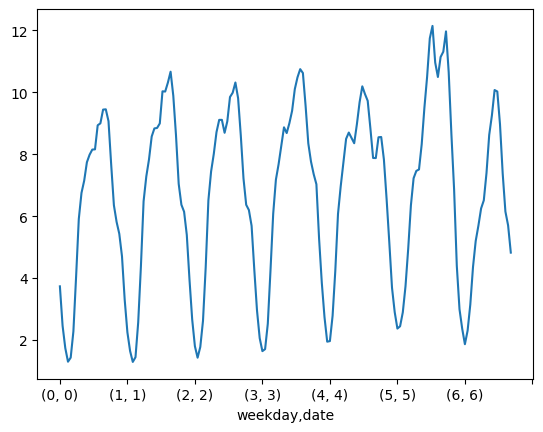

In [120]:
X

df_champs_week["Taux d\'occupation"].plot()

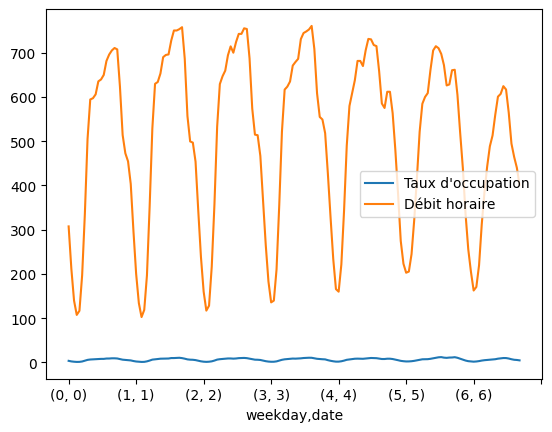

## Data viz 